In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
#Reading given csv file into dataframe
bank_data = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')

In [43]:
#Getting the first look of the data
bank_data.head(50)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


<font size="5">PRELIMINARY ANALYSIS OF DATA</font>

In [44]:
bank_data.shape

(5000, 14)

In [45]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Here we find that there are no null values in any of the columns.

In [46]:
bank_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Personal loan is our target column. ID is a column that can be neglected while building a model. The columns age, experience seem to be normally distributed. Income has a longer tail on the right side, indicating the presence of outliers.

In [47]:
#Since we see that the min value for experience is -3, let us see how many negative values are there in this column, 
#as negative experiences are not valid observations.
bank_data[bank_data['Experience'] < 0]['Experience'].count()

52

In [48]:
exp = bank_data.loc[bank_data['Experience'] >0]
negExp = bank_data.Experience < 0
column_name = 'Experience'
c_list = bank_data.loc[negExp]['ID'].tolist()
for id in c_list:
    age = bank_data.loc[np.where(bank_data['ID']==id)]["Age"].tolist()[0]
    education = bank_data.loc[np.where(bank_data['ID']==id)]["Education"].tolist()[0]
    bank_data_filter = exp[(exp.Age == age) & (exp.Education == education)]
    exp_median = bank_data_filter['Experience'].median()
    bank_data.loc[bank_data.loc[np.where(bank_data['ID']==id)].index, 'Experience'] = exp_median

In [49]:
bank_data[bank_data['Experience'] < 0]['Experience'].count()

0

In [50]:
bank_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


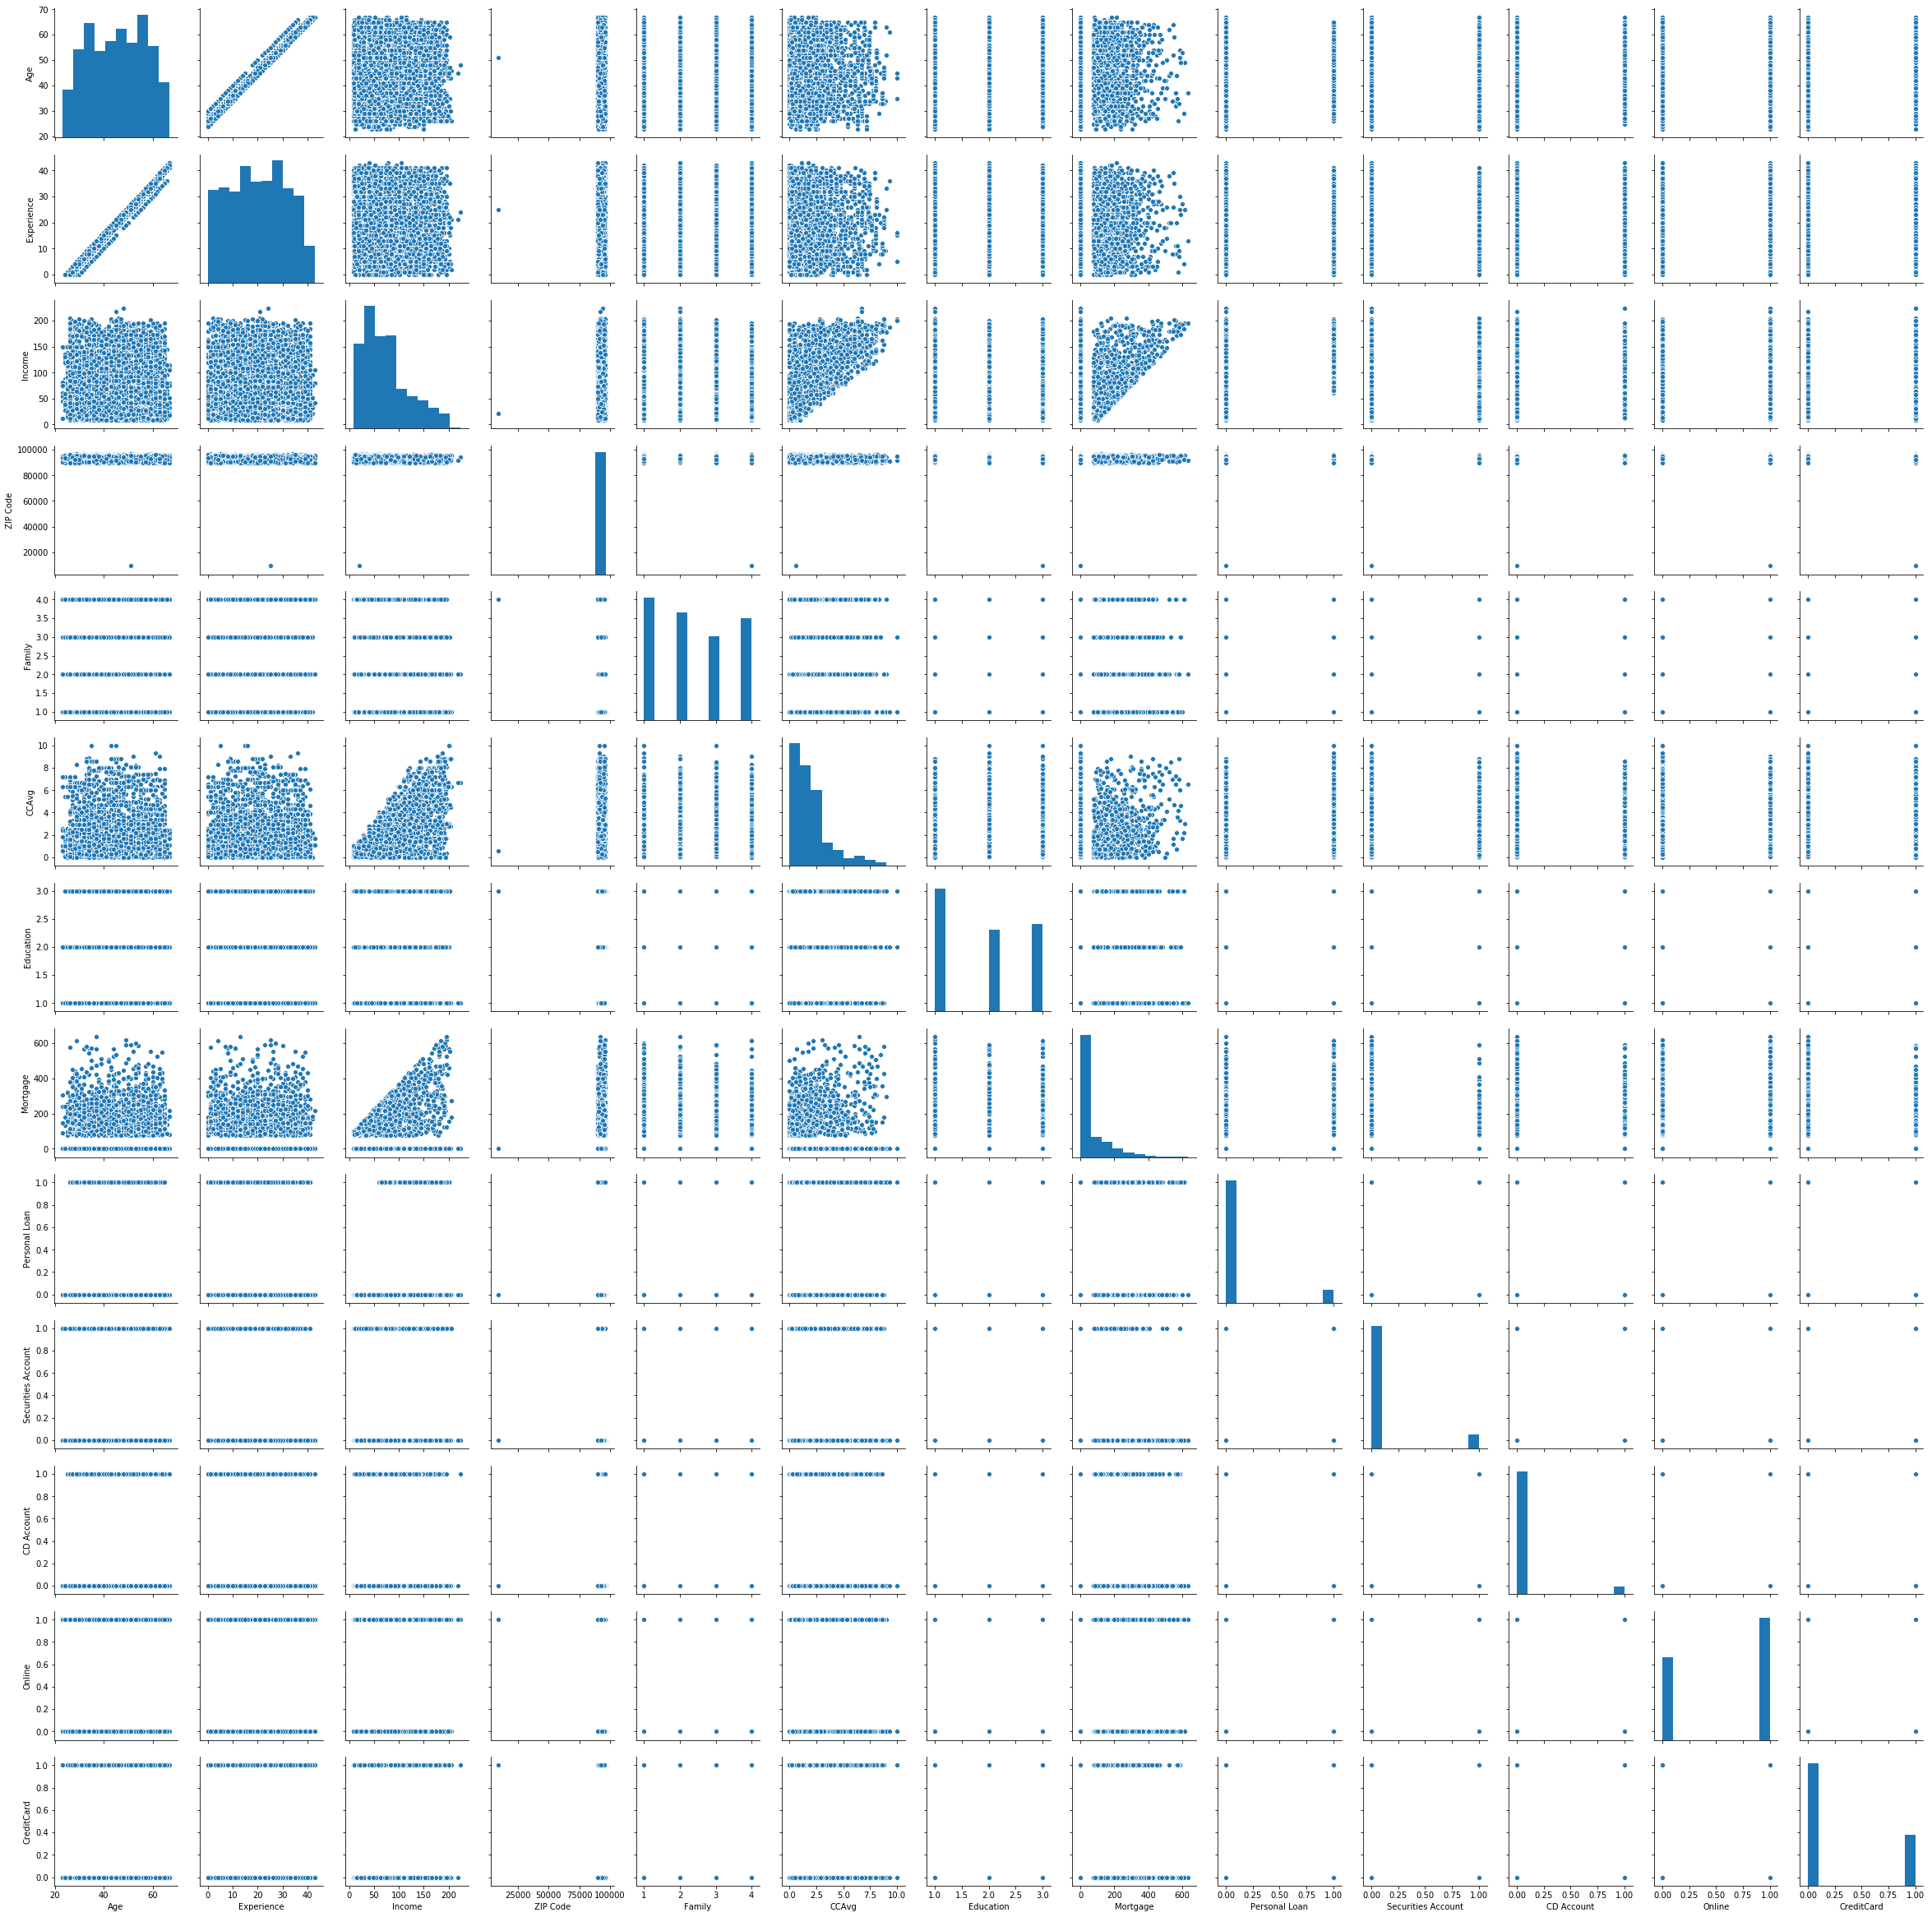

In [51]:
#Doing bivariate analysis
sns.pairplot(bank_data.iloc[:,1:])

#### We can confirm what we found from our describe function that age and experience looks normally distributed. Income column looks positively skewed.

<font size="5">DATA VISUALISATION</font>

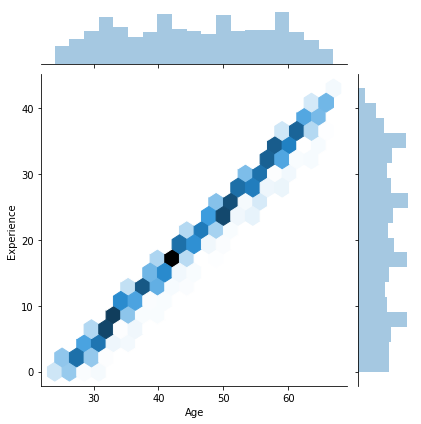

In [52]:
sns.jointplot(bank_data['Age'], bank_data['Experience'], kind = 'hex')

#### Age and experience are very corelated.

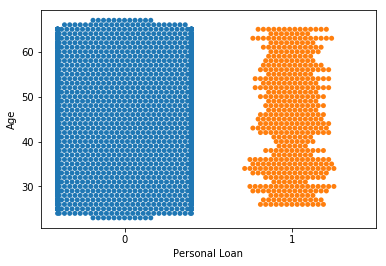

In [53]:
sns.swarmplot(bank_data['Personal Loan'],bank_data['Age'])

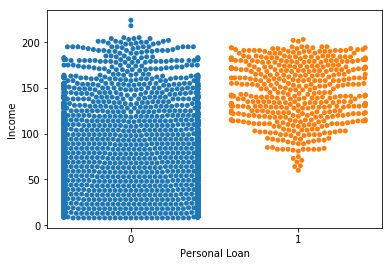

In [54]:
sns.swarmplot(bank_data['Personal Loan'],bank_data['Income'])

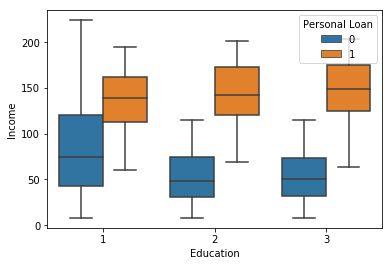

In [55]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=bank_data)

#### We can see that customers with education levels 1,2 and 3 have taken personal loans. So there seems to be no apparent relationship between education level or income and opting for a personal loan. It can be observed here that customers with education level 1 have higher incomes than others. Customers opting for personal loan have same income range irrespective of education level.

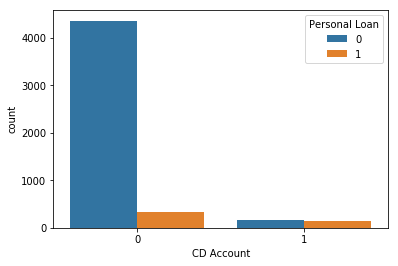

In [56]:
sns.countplot(x='CD Account',data=bank_data,hue='Personal Loan')

#### We can see that nearly all customers with CD account have taken personal loans.

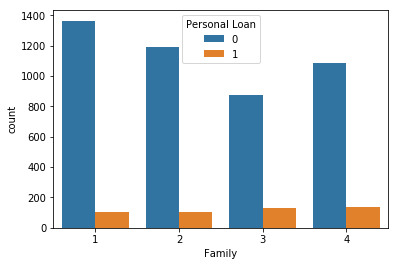

In [57]:
sns.countplot(x='Family',data=bank_data,hue='Personal Loan')

#### There does not seem to be any apparent relationship between family size and personal loans.

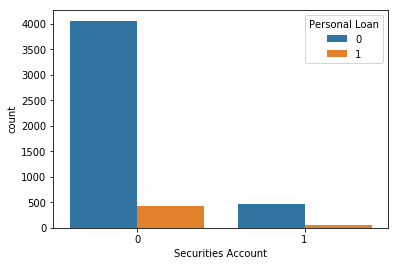

In [58]:
sns.countplot(x="Securities Account", data=bank_data, hue="Personal Loan")

#### Customers without security account have not opted for personal loans more than customers with security account.

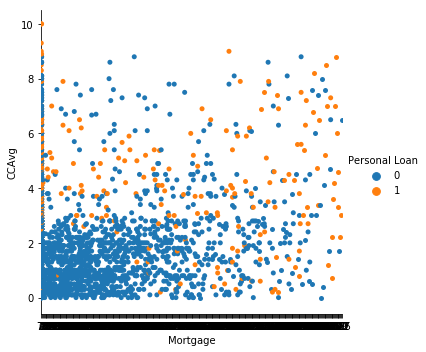

In [59]:
sns.catplot(x='Mortgage', y='CCAvg', hue ='Personal Loan', data = bank_data, kind='swarm')

#### It seems as if customers with higher credit card averages have opted for more personal loans.

<font size="5">BUILDING MODELS</font>

In [60]:
#We saw that age and experience are correlated, so we can drop one of them
X = bank_data.drop(['ID','Experience','Personal Loan'], axis=1)
y = bank_data['Personal Loan']

#### Splitting data into 70:30 ratio for train set:test set

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<font size="5">LOGISTIC REGRESSION MODEL</font>

In [62]:
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

model1=LogisticRegression()
#Applying training dataset to the model
model1.fit(X_train, y_train)

#Use the model to predict test results
y_predict = model1.predict(X_test)

In [65]:
#Calculate the coefficients of logistic regression model
t = list(X_train.columns)
coef_df = pd.DataFrame(model1.coef_, columns= t)
coef_df['intercept'] = model1.intercept_
print(coef_df)

        Age    Income  ZIP Code    Family     CCAvg  Education  Mortgage  \
0 -0.001534  0.036096 -0.000066  0.015184  0.009473   0.016464  0.000834   

   Securities Account  CD Account    Online  CreditCard  intercept  
0            0.000535    0.004685 -0.000176   -0.000068  -0.000106  


In [66]:
# Calculate the model score and print confusion matrix
from sklearn import metrics
model1_score = model1.score(X_test, y_test)
print(model1_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.9073333333333333
[[1318   33]
 [ 106   43]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.57      0.29      0.38       149

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.75      0.63      0.67      1500
weighted avg       0.89      0.91      0.89      1500



### The logistic regression model 'Model1' has 90.73% accuracy. 

In [77]:
#To see the effects of scaling
from sklearn import preprocessing

ScaledX = preprocessing.scale(X)
ScaledX_train, ScaledX_test, y_train, y_test = train_test_split(ScaledX, y, test_size=0.3, random_state=1)

In [78]:
model1_scaled=LogisticRegression()
#Applying training dataset to the model
model1_scaled.fit(ScaledX_train, y_train)

#Use the model to predict test results
y_predict_scaled = model1_scaled.predict(ScaledX_test)

In [80]:
#Calculate the coefficients of logistic regression model
coef_df_scaled = pd.DataFrame(model1_scaled.coef_, columns= t)
coef_df_scaled['intercept'] = model1_scaled.intercept_
print(coef_df_scaled)

        Age    Income  ZIP Code    Family    CCAvg  Education  Mortgage  \
0  0.051464  2.313345  0.018107  0.779962  0.29431   1.345803   0.07746   

   Securities Account  CD Account    Online  CreditCard  intercept  
0           -0.341037    0.871571 -0.285637    -0.49864  -4.569541  


In [81]:
# Calculate the model score and print confusion matrix
model1_scaled_score = model1_scaled.score(ScaledX_test, y_test)
print(model1_scaled_score)
print(metrics.confusion_matrix(y_test, y_predict_scaled))
print(metrics.classification_report(y_test, y_predict_scaled))

0.9486666666666667
[[1336   15]
 [  62   87]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.85      0.58      0.69       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.90      0.79      0.83      1500
weighted avg       0.95      0.95      0.94      1500



### The accuracy of the model has improved to 94.86%.

<font size="5">NAIVE BAYES MODEL</font>

In [67]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()

#Applying training dataset to the model
model2.fit(X_train, y_train)

#Use the model to predict test results
y_predict2 = model2.predict(X_test)

In [69]:
# Calculate the model score and print confusion matrix
model2_score = model2.score(X_test, y_test)
print(model2_score)
print(metrics.confusion_matrix(y_test, y_predict2))
print(metrics.classification_report(y_test, y_predict2))

0.8833333333333333
[[1241  110]
 [  65   84]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1351
           1       0.43      0.56      0.49       149

   micro avg       0.88      0.88      0.88      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500



### The Naive Bayes model 'Model2' has an accuracy of 88.33%

In [83]:
model2_scaled=GaussianNB()
#Applying training dataset to the model
model2_scaled.fit(ScaledX_train, y_train)

#Use the model to predict test results
y_predict2_scaled = model2_scaled.predict(ScaledX_test)

# Calculate the model score and print confusion matrix
model2_scaled_score = model2_scaled.score(ScaledX_test, y_test)
print(model2_scaled_score)
print(metrics.confusion_matrix(y_test, y_predict2_scaled))
print(metrics.classification_report(y_test, y_predict2_scaled))

0.8746666666666667
[[1230  121]
 [  67   82]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.40      0.55      0.47       149

   micro avg       0.87      0.87      0.87      1500
   macro avg       0.68      0.73      0.70      1500
weighted avg       0.89      0.87      0.88      1500



### Here, the accuracy of the model has fallen slightly to 87.47%

<font size="5">KNN MODEL</font>

In [85]:
from sklearn.neighbors import KNeighborsClassifier
model3= KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

#Applying training dataset to the model
model3.fit(X_train, y_train)

#Use the model to predict test results
y_predict3 = model3.predict(X_test)

# Calculate the model score and print confusion matrix
model3_score = model3.score(X_test, y_test)
print(model3_score)
print(metrics.classification_report(y_test, y_predict3))
print(metrics.confusion_matrix(y_test, y_predict3))

0.894
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1351
           1       0.44      0.23      0.31       149

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.68      0.60      0.62      1500
weighted avg       0.87      0.89      0.88      1500

[[1306   45]
 [ 114   35]]


### The k-Nearest Neighbours model 'Model3' has 89.4% accuracy

In [86]:
model3_scaled=KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
#Applying training dataset to the model
model3_scaled.fit(ScaledX_train, y_train)

#Use the model to predict test results
y_predict3_scaled = model3_scaled.predict(ScaledX_test)

# Calculate the model score and print confusion matrix
model3_scaled_score = model3_scaled.score(ScaledX_test, y_test)
print(model3_scaled_score)
print(metrics.confusion_matrix(y_test, y_predict3_scaled))
print(metrics.classification_report(y_test, y_predict3_scaled))

0.9526666666666667
[[1343    8]
 [  63   86]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.91      0.58      0.71       149

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.94      0.79      0.84      1500
weighted avg       0.95      0.95      0.95      1500



### Here, the accuracy of the model has increased drastically to 95.27%.

<font size="4">Before scaling of data, we find that the Logistic Regression model (90.73%) and the k-nearest negihbour model (89.4%) have the most accuracy. The logistic regression model gives 43 true positives and 1318 true negatives, whereas the KNN model gives 35 true positives and 1306 true negatives.</font>

<font size="4">However, after scaling of data, we can see that the k-Nearest Neighbour model is the clear winner here, with an accuracy of 95.27%. From the confusion matrix, we can see that it gives 86 true positives and 1343 true negatives.</font>